# Localization

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

## Initial Belief of Position in a given environment - _Uniform Probability_

In [3]:
n_positions = 5
positions = [1/n_positions for _ in range(n_positions)]
positions

[0.2, 0.2, 0.2, 0.2, 0.2]

In [4]:
def init_belief(n_positions: int) -> list:
    """ Initialize belief of positions in an environment with uniform probability """
    return [1/n_positions for _ in range(n_positions)]

In [5]:
belief = init_belief(n_positions)
belief

[0.2, 0.2, 0.2, 0.2, 0.2]

The environment cells have two colors: green and red.

The robot senses that it's in a red cell. The respective probabilities for sensing red/green cells are 0.6/0.2.

When given the actual environment, show the robot's belief in its position.

In [6]:
RED = 'RED'
GREEN = 'GREEN'
pHit = 0.6
pMiss = 0.2

In [7]:
robot_sense = {RED: pHit, GREEN: pMiss} # sensing RED is a hit

In [8]:
actual_environment = [GREEN, RED, RED, GREEN, GREEN]

In [9]:
def update_belief(robot_sense: dict, 
                  current_belief:list,
                  actual_environment: list) -> list:
    """ Update a robot's belief of its position in the given environment """
    
    sensed_prob = [belief * robot_sense[pos] # belief combined with sense
                   for (belief, pos) in zip(current_belief,
                                            actual_environment)]
    total_sensed_prob = sum(sensed_prob)
    # normalize sensed probabilities to create a belief (sums to 1)
    belief = [p/total_sensed_prob for p in sensed_prob]
    return belief

In [10]:
belief = update_belief(robot_sense, positions, actual_environment)
assert math.isclose(sum(belief), 1)
belief

[0.1111111111111111,
 0.3333333333333332,
 0.3333333333333332,
 0.1111111111111111,
 0.1111111111111111]

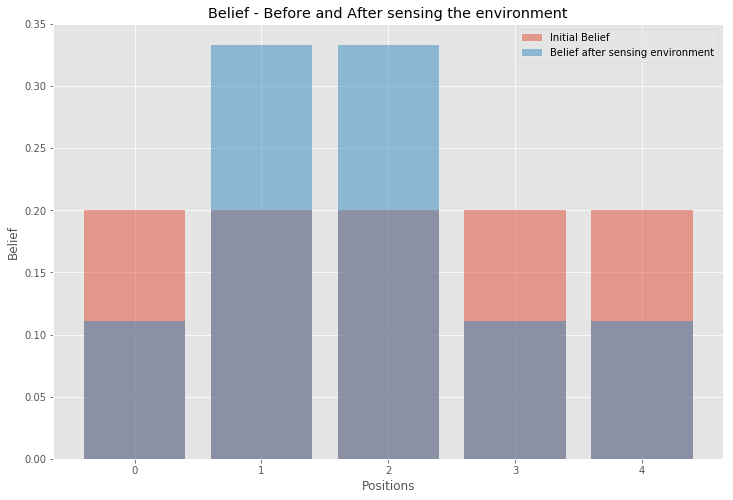

In [11]:
X = range(n_positions)
plt.bar(X, positions, alpha=0.5, label='Initial Belief')
plt.bar(X, belief, alpha=0.5,label='Belief after sensing environment')
plt.legend()
plt.title("Belief - Before and After sensing the environment")
plt.xlabel("Positions")
plt.ylabel("Belief")
None

_The robot sensed it was in a RED cell, so both red cells have equal probability_

---

What if the robot uses GREEN as a hit?

In [12]:
robot_sense = {RED: pMiss, GREEN: pHit} # sensing GREEN is a hit

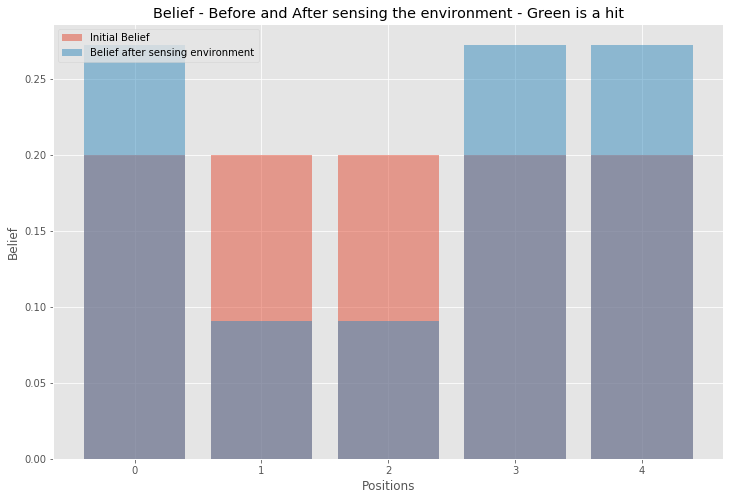

In [13]:
belief = update_belief(robot_sense, positions, actual_environment)
assert math.isclose(sum(belief), 1)

X = range(n_positions)
plt.bar(X, positions, alpha=0.5, label='Initial Belief')
plt.bar(X, belief, alpha=0.5,label='Belief after sensing environment')
plt.legend()
plt.title("Belief - Before and After sensing the environment - Green is a hit")
plt.xlabel("Positions")
plt.ylabel("Belief")
None

---

What if the robot can sense multiple cells in sequence?

Establish how the robot will sense the environment
- Use measurements (cell colors) for the robot to signal a hit or miss 

In [14]:
RED_HIT =  {RED: pHit, GREEN: pMiss} 
GREEN_HIT = {RED: pMiss, GREEN: pHit} 

In [15]:
robot_sense = {
    RED: RED_HIT,
    GREEN: GREEN_HIT
}

In [16]:
measurements = [RED, GREEN]

In [17]:
belief = init_belief(n_positions)
actual_environment = [GREEN, RED, RED, GREEN, GREEN]

In [18]:
belief = list(positions)
for measurement in measurements:
    belief = update_belief(robot_sense[measurement],
                           belief, 
                           actual_environment)

In [19]:
belief

[0.20000000000000004,
 0.19999999999999996,
 0.19999999999999996,
 0.20000000000000004,
 0.20000000000000004]

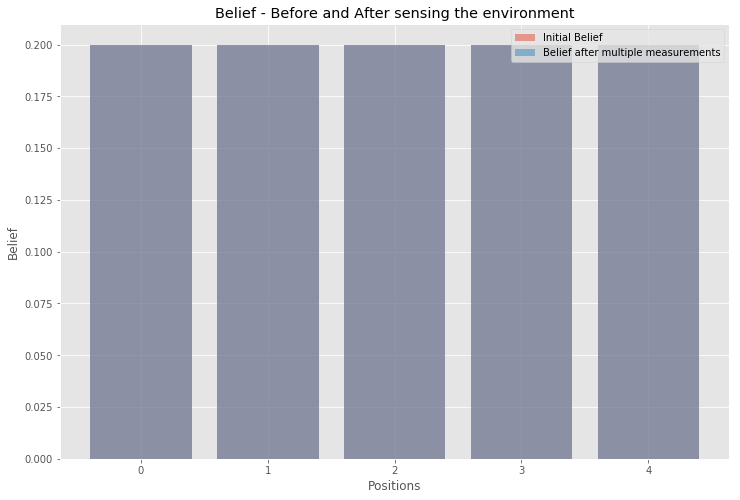

In [20]:
X = range(n_positions)
plt.bar(X, positions, alpha=0.5, label='Initial Belief')
plt.bar(X, belief, alpha=0.5,label='Belief after multiple measurements')
plt.legend()
plt.title("Belief - Before and After sensing the environment")
plt.xlabel("Positions")
plt.ylabel("Belief")
None

---

## Cyclical World

In [21]:
def cyclical_move(positions: list, move_units: int) -> list:
    """ Move in a cyclical environment """
    length = len(positions)
    return [positions[(i-move_units)%length] for i in range(length)]

In [22]:
positions = [0, 1, 0, 0, 0]
cyclical_move(positions, 1) # Move 1 to the right

[0, 0, 1, 0, 0]

In [23]:
positions = [1, 0, 0, 0, 0]
cyclical_move(positions, -1) # Move 1 to the left cyclically

[0, 0, 0, 0, 1]

---

## Inaccurate Motion

Describe the robots uncertainty in motion:
- Establish probabilities of under/over shooting
    - undershoot: target index - 1
    - overshoot: target index + 1

In [24]:
robot_motion = {
    -1:0.1,
    0:0.8,
    1:0.1
}

In [25]:
def uncertain_cyclical_move(robot_motion, positions: list, move_units: int) -> list:
    """ Move in a cyclical environment with an uncertain robot """
    q = cyclical_move(positions, move_units)
    ixs = [ix for (ix, pos) in enumerate(q) if pos > 0]
    for ix in ixs:
        ix_under = (ix-1)%len(q)
        ix_over = (ix+1)%len(q)
        q[ix_under] += robot_motion[-1] * q[ix] # undershoot
        q[ix_over] += robot_motion[1] * q[ix] # overshoot
        q[ix] *= robot_motion[0] # exact
            
    return q

In [26]:
positions = [0, 1, 0, 0, 0]
belief = uncertain_cyclical_move(robot_motion, positions, 2)
belief

[0, 0, 0.1, 0.8, 0.1]

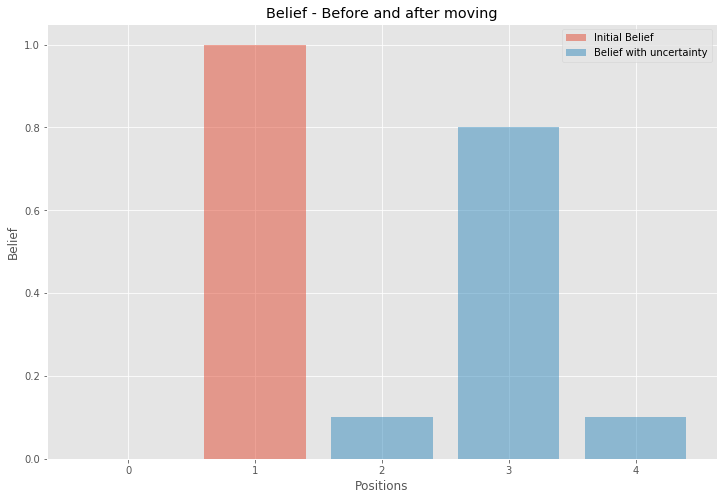

In [27]:
X = range(n_positions)
plt.bar(X, positions, alpha=0.5, label='Initial Belief')
plt.bar(X, belief, alpha=0.5,label='Belief with uncertainty')
plt.legend()
plt.title("Belief - Before and after moving")
plt.xlabel("Positions")
plt.ylabel("Belief")
None

In [28]:
positions = [0, 0.5, 0, 0.5, 0]
belief = uncertain_cyclical_move(robot_motion, positions, 2)
belief

[0.4, 0.05, 0.05, 0.4, 0.1]

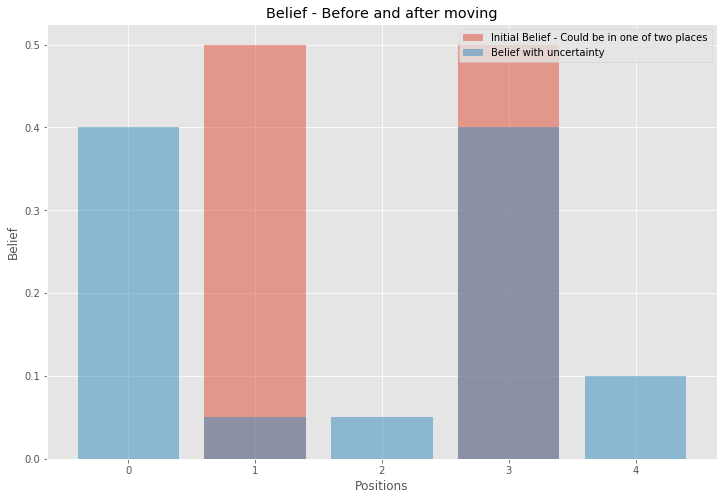

In [29]:
X = range(n_positions)
plt.bar(X, positions, alpha=0.5, label='Initial Belief - Could be in one of two places')
plt.bar(X, belief, alpha=0.5,label='Belief with uncertainty')
plt.legend()
plt.title("Belief - Before and after moving")
plt.xlabel("Positions")
plt.ylabel("Belief")
None

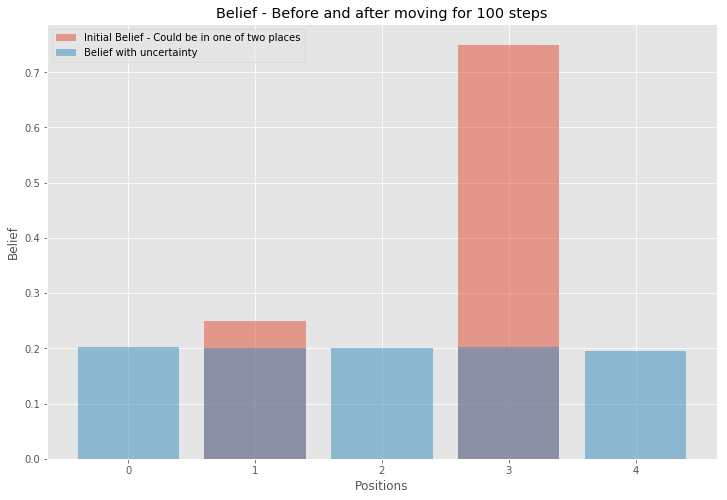

In [30]:
positions = [0, 0.25, 0, 0.75, 0]
N = 100
belief = list(positions)
for _ in range(N): # take N steps
    belief = uncertain_cyclical_move(robot_motion, belief, 1)

X = range(n_positions)
plt.bar(X, positions, alpha=0.5, label='Initial Belief - Could be in one of two places')
plt.bar(X, belief, alpha=0.5,label='Belief with uncertainty')
plt.legend()
plt.title(f"Belief - Before and after moving for {N} steps")
plt.xlabel("Positions")
plt.ylabel("Belief")
None

_The above plot illustrates the loss of information when moving with uncertainty and without sensing the environment while moving_

---

## Simulate the robot sensing and moving in the environment

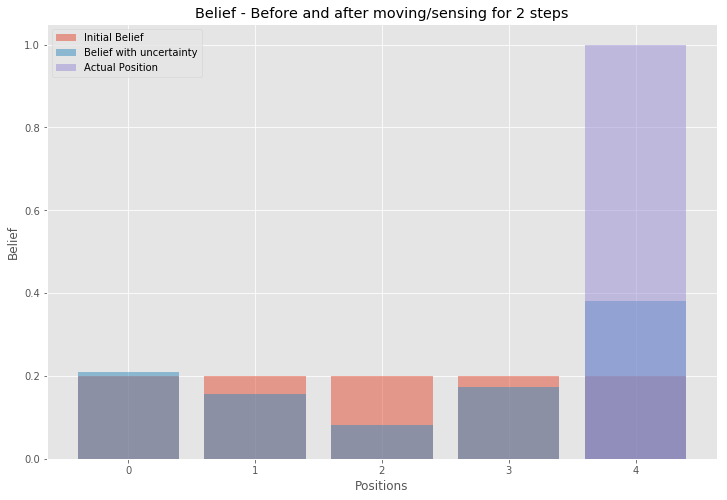

In [31]:
environment = [GREEN, RED, RED, GREEN, GREEN]
measurements = [RED, GREEN]
movements = [1, 1]

# In this environment, sensing RED, moving 1 to the right, then sensing GREEN
# and moving 1 to the right means the robot will end in position (index) 4
actual_position = 4

robot_sense = {
    RED: RED_HIT,
    GREEN: GREEN_HIT
}
robot_motion = {
    -1:0.1, # undershoot
    0:0.8, # exact
    1:0.1 # overshoot
}

n_positions = len(environment)
initial_belief = init_belief(n_positions)
belief = list(initial_belief)
for (move, measurement) in zip(movements, measurements):
    belief = update_belief(robot_sense[measurement], belief, environment) # sense the environment
    belief = uncertain_cyclical_move(robot_motion, belief, move) # move with uncertainty
    
X = range(n_positions)
plt.bar(X, initial_belief, alpha=0.5, label='Initial Belief')
plt.bar(X, belief, alpha=0.5,label='Belief with uncertainty')
plt.bar(actual_position, 1, alpha=0.5, label="Actual Position")
plt.legend()
plt.title(f"Belief - Before and after moving/sensing for {len(movements)} steps")
plt.xlabel("Positions")
plt.ylabel("Belief")
None